In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [ ]:
!conda create --name myenv python=3.8

In [ ]:
!conda --version

In [ ]:
!conda install pandas numpy matplotlib

In [ ]:
!conda create -c conda-forge -n pymc_env "pymc>=5"
!conda activate pymc_env

In [ ]:
pip install bambi

In [ ]:
import warnings
import pandas as pd
import numpy as np
import pymc as pm
import bambi as bmb

In [ ]:
df = pd.read_csv('patients_clean.csv')
df =df.drop([ 'Horodateur', 'Unnamed: 0', 'Height_bins', 'Height_bin_val'], axis=1)
df

,Age,Height,Weight,Gender,Diagnosis,Marital Status,Income,Length of Stay,Location/distance,Cost of stay,...,Inpatient/outpatient,Previous admission,Severity of injuries,Condition at discharge,Admission Type,Blood types,age_g,Close_dist,LOSgroupNum,AdmitDiagGroup
0,10,149.86,32,1,Asthma,Single,0.333333,0.08,5.0,1.0,...,0,1,Non-life Threatening,Stable,Elective,A,2,1,0.0,Respiratory System
1,21,172.00,55,1,Depression,Single,0.333333,2.40,3.0,1000.0,...,0,1,Life-threatening,Stable,Elective,O,4,1,0.0,"Pregnancy, Childbirth, and Puerperium"
2,13,145.00,43,0,Hypertension,Single,0.333333,24.00,12.0,234.0,...,1,0,Superficial,Stable,Elective,RH-positive,2,0,8.0,Circulatory System
3,55,170.00,150,0,Asthma,Married,0.666667,0.20,5.0,100.0,...,0,0,Non-life Threatening,Stable,Emergency,O,6,1,0.0,Respiratory System
4,22,183.00,180,0,Dementia,Single,0.333333,0.20,8.0,5000.0,...,1,1,Severe,Improved,Elective,B,4,0,0.0,Mental and Behavioral Disorders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,23,175.00,68,1,Appendicitis,Single,0.666667,0.30,5.0,0.0,...,1,0,Superficial,Stable,Urgent,B,4,1,0.0,"Injury, Poisoning, Certain Other Consequences ..."
57,65,180.00,76,0,Hypertension,Married,0.666667,0.25,12.0,300.0,...,0,1,Severe,Stable,Emergency,O,7,0,0.0,Circulatory System
58,70,165.00,58,1,Cancer,Divorced,0.666667,10.00,37.0,55000.0,...,1,1,Severe,Unchanged,Urgent,AB,7,0,2.0,"Symptoms, Signs and Abnormal Clinical and Lab ..."
59,50,180.00,90,0,Gastrointestinal Bleeding,Married,0.666667,5.00,4.0,300.0,...,1,0,Life-threatening,Stable,Emergency,B,6,1,1.0,Digestive System


In [ ]:
df.describe()

,Age,Height,Weight,Gender,Income,Length of Stay,Location/distance,Cost of stay,Inpatient/outpatient,Previous admission,age_g,Close_dist,LOSgroupNum
count,61.000000,61.00000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,34.278689,167.20459,73.344262,0.409836,0.612022,3.072951,16.165574,5452.355246,0.557377,0.622951,4.639344,0.295082,0.573770
std,18.279434,28.73464,26.312155,0.495885,0.220943,4.843685,25.384161,13375.725085,0.500819,0.488669,1.378801,0.459865,1.499545
min,1.000000,1.62000,12.000000,0.000000,0.333333,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,163.00000,58.000000,0.000000,0.333333,0.250000,5.000000,300.000000,0.000000,0.000000,4.000000,0.000000,0.000000
50%,25.000000,173.00000,70.000000,0.000000,0.666667,0.500000,10.000000,1000.000000,1.000000,1.000000,4.000000,0.000000,0.000000
75%,49.000000,180.00000,84.000000,1.000000,0.666667,5.000000,18.000000,2500.000000,1.000000,1.000000,6.000000,1.000000,1.000000
max,84.000000,205.00000,180.000000,1.000000,1.000000,24.000000,180.000000,57985.000000,1.000000,1.000000,8.000000,1.000000,8.000000


In [ ]:
# Print the value counts for categorical columns
for col in df.columns:
    if df[col].dtype == 'object':
        print('\nColumn Name:', col,)
        print(df[col].value_counts())


Column Name: Diagnosis
Diagnosis
Asthma                       11
Depression                    7
Hypertension                  6
Diabetes Mellitus             6
Appendicitis                  5
Cancer                        5
Fractured Hip                 4
Anxiety Disorder              4
Pneumonia                     4
Stroke                        3
Gastrointestinal Bleeding     3
Dementia                      1
Osteoarthritis                1
Schizophrenia                 1
Name: count, dtype: int64

Column Name: Marital Status
Marital Status
Single      34
Married     18
Divorced     5
Widowed      4
Name: count, dtype: int64

Column Name: Payment method
Payment method
Insurance      25
Credit card    19
Debit Card     15
Cash            1
Other           1
Name: count, dtype: int64

Column Name: Severity of injuries
Severity of injuries
Non-life Threatening    27
Severe                  15
Life-threatening        10
Superficial              9
Name: count, dtype: int64

Column Name

In [ ]:
df = df.drop(columns=['Diagnosis'])
df = pd.get_dummies(df, prefix_sep='')
df = df *1
df.head()

,Age,Height,Weight,Gender,Income,Length of Stay,Location/distance,Cost of stay,Inpatient/outpatient,Previous admission,...,AdmitDiagGroupCirculatory System,AdmitDiagGroupDigestive System,"AdmitDiagGroupEndocrine, Nutritional, Metabolic","AdmitDiagGroupInjury, Poisoning, Certain Other Consequences of External Causes",AdmitDiagGroupMental and Behavioral Disorders,AdmitDiagGroupMusculoskeletal and Connective Tissue,AdmitDiagGroupNervous System,"AdmitDiagGroupPregnancy, Childbirth, and Puerperium",AdmitDiagGroupRespiratory System,"AdmitDiagGroupSymptoms, Signs and Abnormal Clinical and Lab Findings"
0,10,149.86,32,1,0.333333,0.08,5.0,1.0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,21,172.00,55,1,0.333333,2.40,3.0,1000.0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,13,145.00,43,0,0.333333,24.00,12.0,234.0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,55,170.00,150,0,0.666667,0.20,5.0,100.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,22,183.00,180,0,0.333333,0.20,8.0,5000.0,1,1,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
df.columns = ['Age','Height','Weight','Gender','Income','LOS',
'Locationdistance','Costofstay','Inpatientoutpatient',
'Previousadmission','ageg','Closedist','LOSgroupNum',
'MaritalStatusDivorced','MaritalStatusMarried',
'MaritalStatusSingle','MaritalStatusWidowed',
'PaymentmethodCash','PaymentmethodCreditcard',
'PaymentmethodDebitCard','PaymentmethodInsurance',
'PaymentmethodOther','SeverityofinjuriesLifethreatening',
'SeverityofinjuriesNonlifeThreatening',
'SeverityofinjuriesSevere','SeverityofinjuriesSuperficial',
'ConditionatdischargeImproved','ConditionatdischargeStable',
'ConditionatdischargeUnchanged','ConditionatdischargeWorsened',
'AdmissionTypeElective','AdmissionTypeEmergency',
'AdmissionTypeUrgent','BloodtypesA','BloodtypesAB',
'BloodtypesB','BloodtypesO','BloodtypesRHnegative',
'BloodtypesRHpositive','AdmitDiagGroupCirculatorySystem',
'AdmitDiagGroupDigestiveSystem',
'AdmitDiagGroupEndocrineNutritionalMetabolic',
'AdmitDiagGroupInjuryPoisoningCertainOtherConsequencesofExternalCauses',
'AdmitDiagGroupMentalandBehavioralDisorders',
'AdmitDiagGroupMusculoskeletalandConnectiveTissue',
'AdmitDiagGroupNervousSystem',
'AdmitDiagGroupPregnancyChildbirthandPuerperium',
'AdmitDiagGroupRespiratorySystem',
'AdmitDiagGroupSymptomsSignsandAbnormalClinicalandLabFindings']

## Variable Correlations With LOS

In [ ]:
df.corr()['LOS'].abs().sort_values(ascending=False)

LOS                                                                      1.000000
LOSgroupNum                                                              0.952839
BloodtypesRHpositive                                                     0.562401
Locationdistance                                                         0.326116
MaritalStatusWidowed                                                     0.291003
Closedist                                                                0.284281
Weight                                                                   0.246329
AdmitDiagGroupNervousSystem                                              0.223795
AdmitDiagGroupCirculatorySystem                                          0.209845
SeverityofinjuriesNonlifeThreatening                                     0.202404
Inpatientoutpatient                                                      0.201374
ConditionatdischargeWorsened                                             0.186160
PaymentmethodOth

# Bayesian Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
def format_data(df):
    # Targets are final grade of student
    labels = df['LOS']

    # Find correlations with the Grade
    most_correlated = df.corr().abs()['LOS'].abs().sort_values(ascending=False)
    most_correlated = most_correlated[:27]
    df = df[np.intersect1d(df.columns, most_correlated.index)]
    # Split into training/testing sets with 25% split
    X_train, X_test, y_train, y_test = train_test_split(df, labels,
                                                        test_size = .25,
                                                        random_state=42)
    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = format_data(df)
X_train = X_train.drop(columns=['LOS', 'LOSgroupNum'])
X_train.shape

(45, 25)

In [ ]:
formula = 'LOS ~ ' + ' + '.join(['%s' % variable for variable in X_train.columns[1:]])
formula

'LOS ~ AdmissionTypeUrgent + AdmitDiagGroupCirculatorySystem + AdmitDiagGroupInjuryPoisoningCertainOtherConsequencesofExternalCauses + AdmitDiagGroupNervousSystem + AdmitDiagGroupRespiratorySystem + BloodtypesO + BloodtypesRHnegative + BloodtypesRHpositive + Closedist + ConditionatdischargeImproved + ConditionatdischargeStable + ConditionatdischargeWorsened + Costofstay + Income + Inpatientoutpatient + Locationdistance + MaritalStatusWidowed + PaymentmethodCash + PaymentmethodCreditcard + PaymentmethodOther + SeverityofinjuriesLifethreatening + SeverityofinjuriesNonlifeThreatening + SeverityofinjuriesSevere + Weight'

In [ ]:
model = bmb.Model(formula, df)

In [ ]:
# Initialize the model, passing in the dataset we want to use.
model = bmb.Model(formula, df)

# Set a custom prior on group specific factor variances—just for illustration
group_specific_sd = bmb.Prior("HalfNormal", sigma=10)
group_specific_prior = bmb.Prior("Normal", mu=0, sigma=group_specific_sd)
model.set_priors(group_specific=group_specific_prior)

# Fit the model, drawing 1,000 MCMC draws per chain
results = model.fit(draws=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [LOS_sigma, Intercept, AdmissionTypeUrgent, AdmitDiagGroupCirculatorySystem, AdmitDiagGroupInjuryPoisoningCertainOtherConsequencesofExternalCauses, AdmitDiagGroupNervousSystem, AdmitDiagGroupRespiratorySystem, BloodtypesO, BloodtypesRHnegative, BloodtypesRHpositive, Closedist, ConditionatdischargeImproved, ConditionatdischargeStable, ConditionatdischargeWorsened, Costofstay, Income, Inpatientoutpatient, Locationdistance, MaritalStatusWidowed, PaymentmethodCash, PaymentmethodCreditcard, PaymentmethodOther, SeverityofinjuriesLifethreatening, SeverityofinjuriesNonlifeThreatening, SeverityofinjuriesSevere, Weight]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 319 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


Sampling: [AdmissionTypeUrgent, AdmitDiagGroupCirculatorySystem, AdmitDiagGroupInjuryPoisoningCertainOtherConsequencesofExternalCauses, AdmitDiagGroupNervousSystem, AdmitDiagGroupRespiratorySystem, BloodtypesO, BloodtypesRHnegative, BloodtypesRHpositive, Closedist, ConditionatdischargeImproved, ConditionatdischargeStable, ConditionatdischargeWorsened, Costofstay, Income, Inpatientoutpatient, Intercept, LOS_sigma, Locationdistance, MaritalStatusWidowed, PaymentmethodCash, PaymentmethodCreditcard, PaymentmethodOther, SeverityofinjuriesLifethreatening, SeverityofinjuriesNonlifeThreatening, SeverityofinjuriesSevere, Weight]


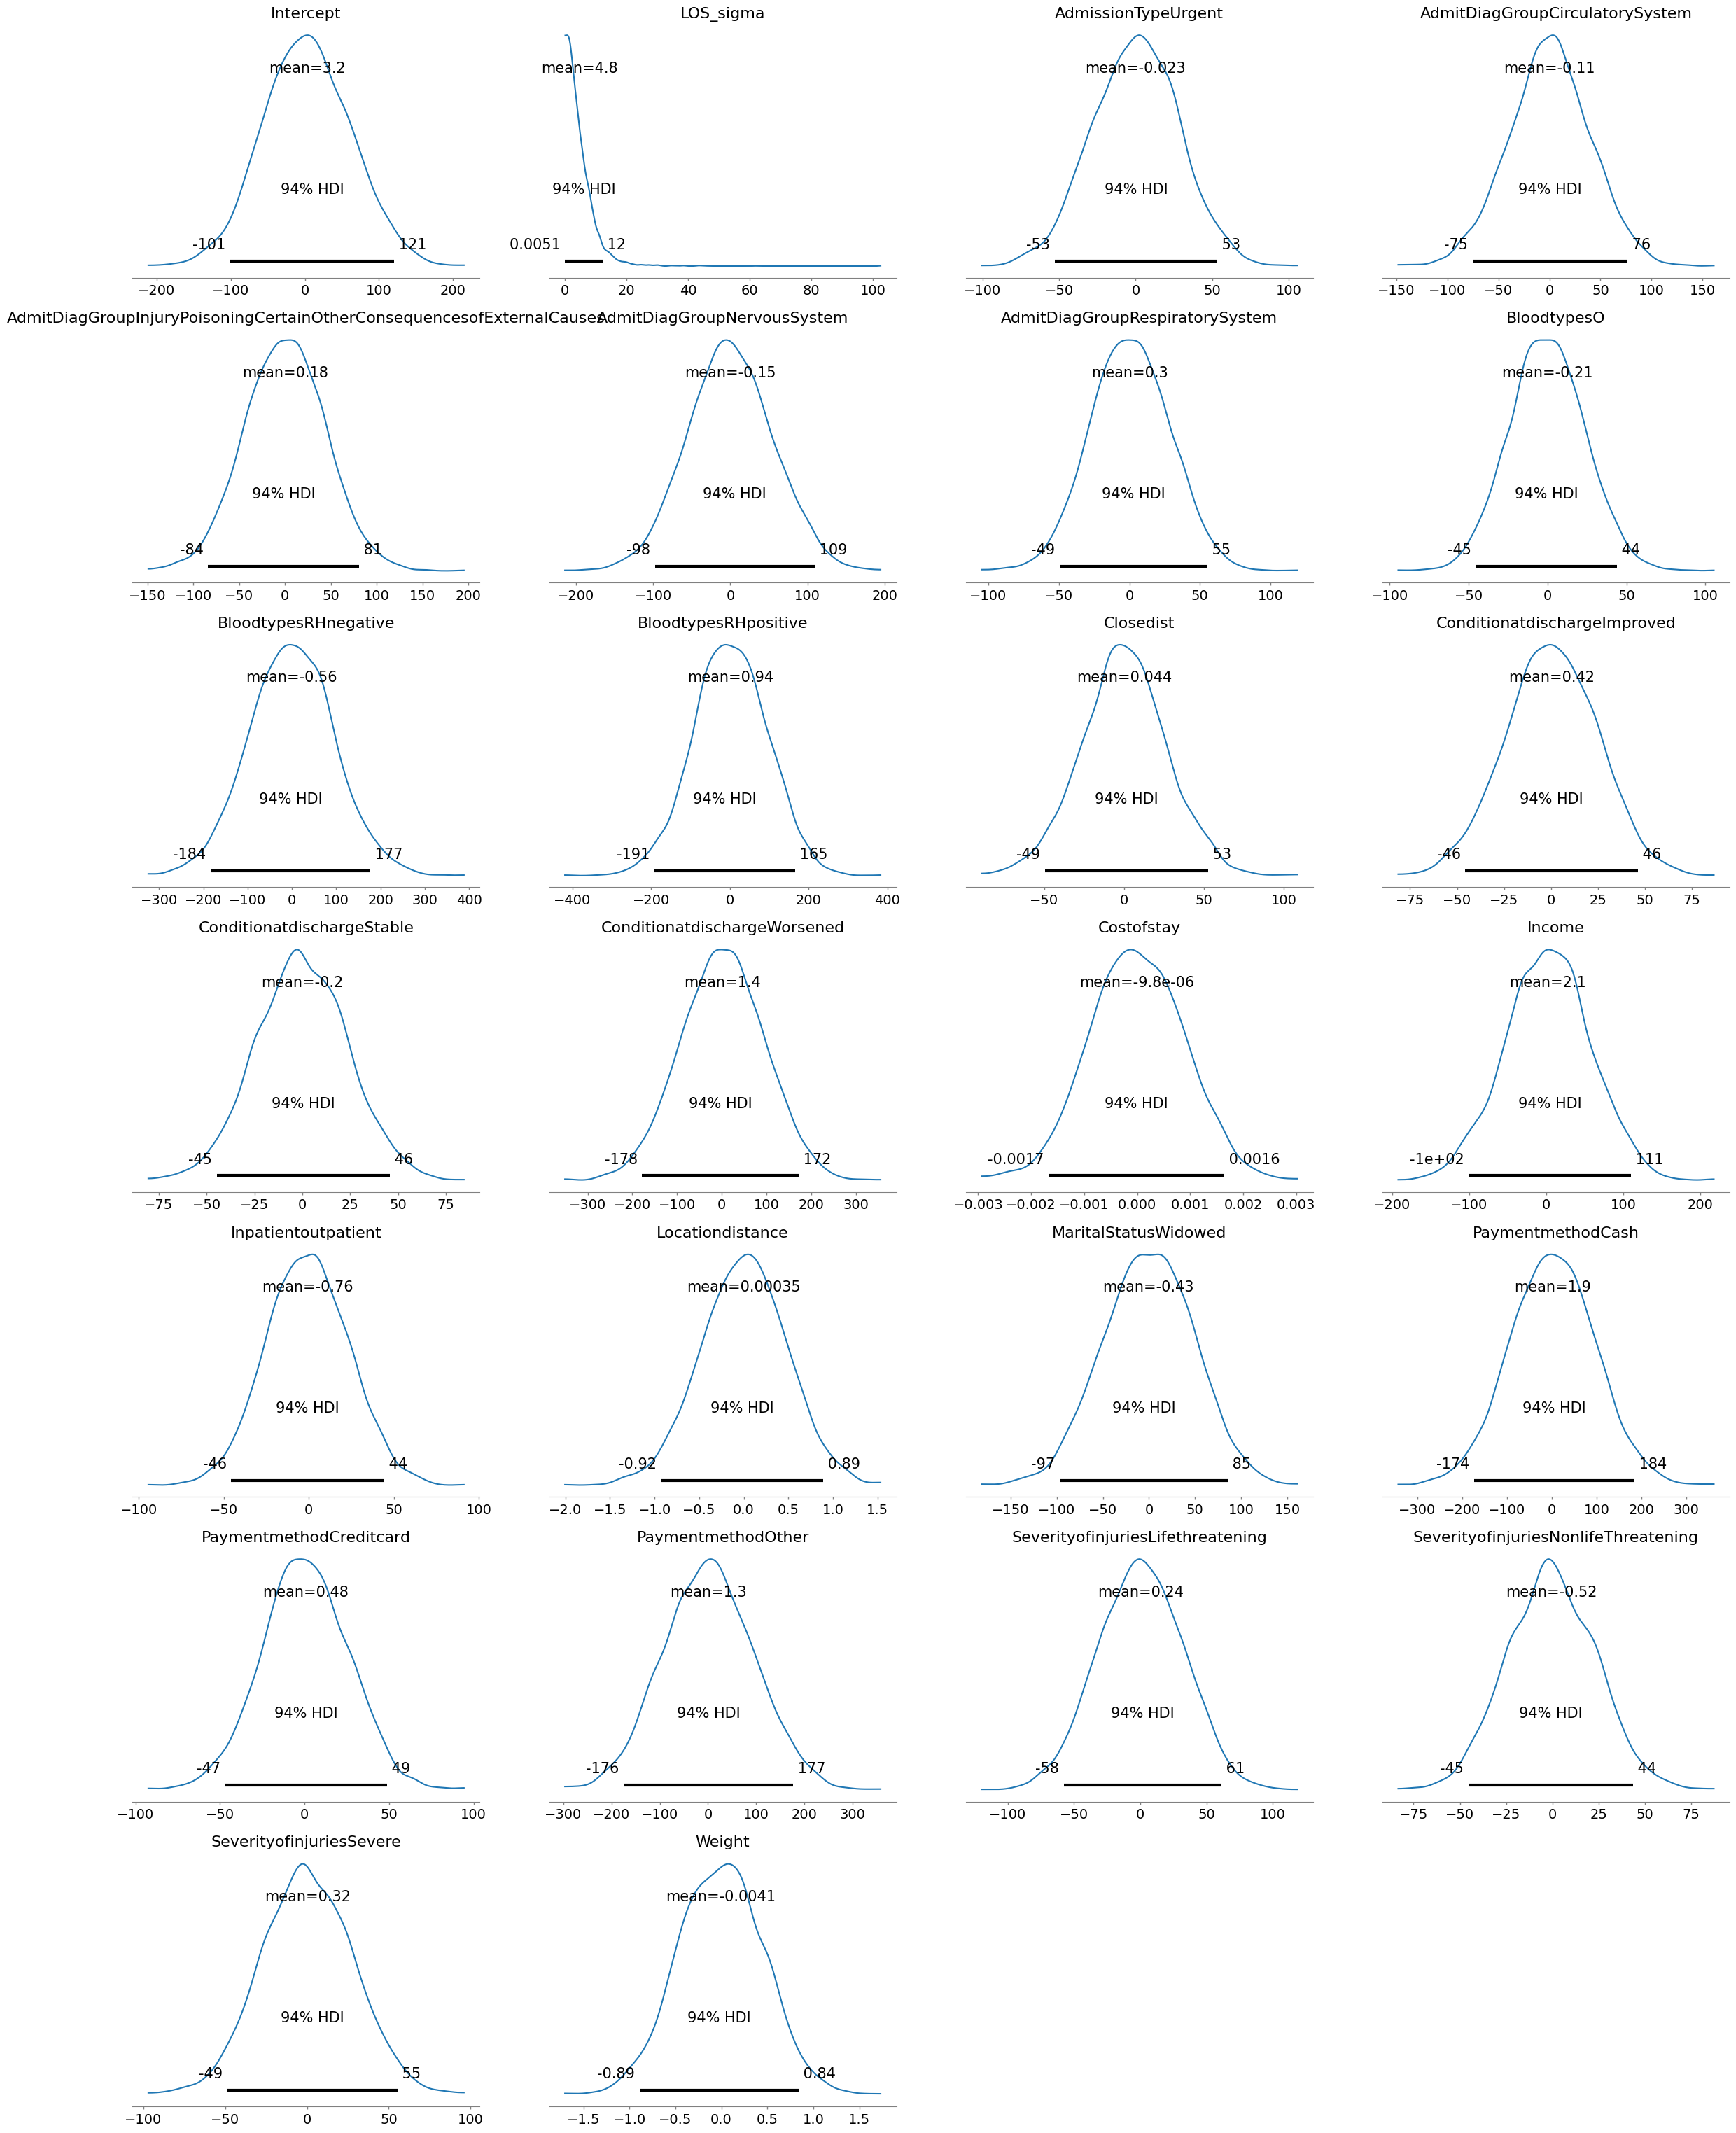

In [ ]:
model.plot_priors();

In [ ]:
import arviz as az

In [ ]:
az.summary(results, var_names=["Intercept", 'AdmissionTypeUrgent' , 'AdmitDiagGroupCirculatorySystem' , 'AdmitDiagGroupInjuryPoisoningCertainOtherConsequencesofExternalCauses' , 'AdmitDiagGroupNervousSystem' , 'AdmitDiagGroupRespiratorySystem' , 'BloodtypesO' , 'BloodtypesRHnegative' , 'BloodtypesRHpositive' , 'Closedist' , 'ConditionatdischargeImproved' , 'ConditionatdischargeStable' , 'ConditionatdischargeWorsened' , 'Costofstay' , 'Income' , 'Inpatientoutpatient' , 'Locationdistance' , 'MaritalStatusWidowed' , 'PaymentmethodCash' , 'PaymentmethodCreditcard' , 'PaymentmethodOther' , 'SeverityofinjuriesLifethreatening' , 'SeverityofinjuriesNonlifeThreatening' , 'SeverityofinjuriesSevere' , 'Weight'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-1.799,3.600,-8.214,5.255,0.092,0.073,1538.0,1283.0,1.00
AdmissionTypeUrgent,1.844,1.342,-0.613,4.400,0.032,0.023,1782.0,1359.0,1.00
AdmitDiagGroupCirculatorySystem,-0.661,2.291,-4.762,3.729,0.058,0.045,1545.0,1426.0,1.00
AdmitDiagGroupInjuryPoisoningCertainOtherConsequencesofExternalCauses,-0.602,2.262,-5.030,3.360,0.053,0.045,1810.0,1483.0,1.00
AdmitDiagGroupNervousSystem,2.451,3.952,-5.128,9.674,0.109,0.086,1306.0,1118.0,1.00
AdmitDiagGroupRespiratorySystem,0.174,1.498,-2.796,2.858,0.037,0.030,1625.0,1461.0,1.00
BloodtypesO,-0.920,1.142,-3.043,1.193,0.025,0.023,2024.0,1487.0,1.00
BloodtypesRHnegative,0.865,77.237,-148.804,141.700,1.474,1.874,2733.0,1521.0,1.00
BloodtypesRHpositive,23.845,4.996,14.416,33.264,0.125,0.088,1610.0,1454.0,1.00
Closedist,0.031,1.607,-3.049,2.975,0.038,0.035,1775.0,1248.0,1.00


/usr/local/lib/python3.10/site-packages/arviz/plots/traceplot.py:222: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (25), generating only 20 plots
  warnings.warn(


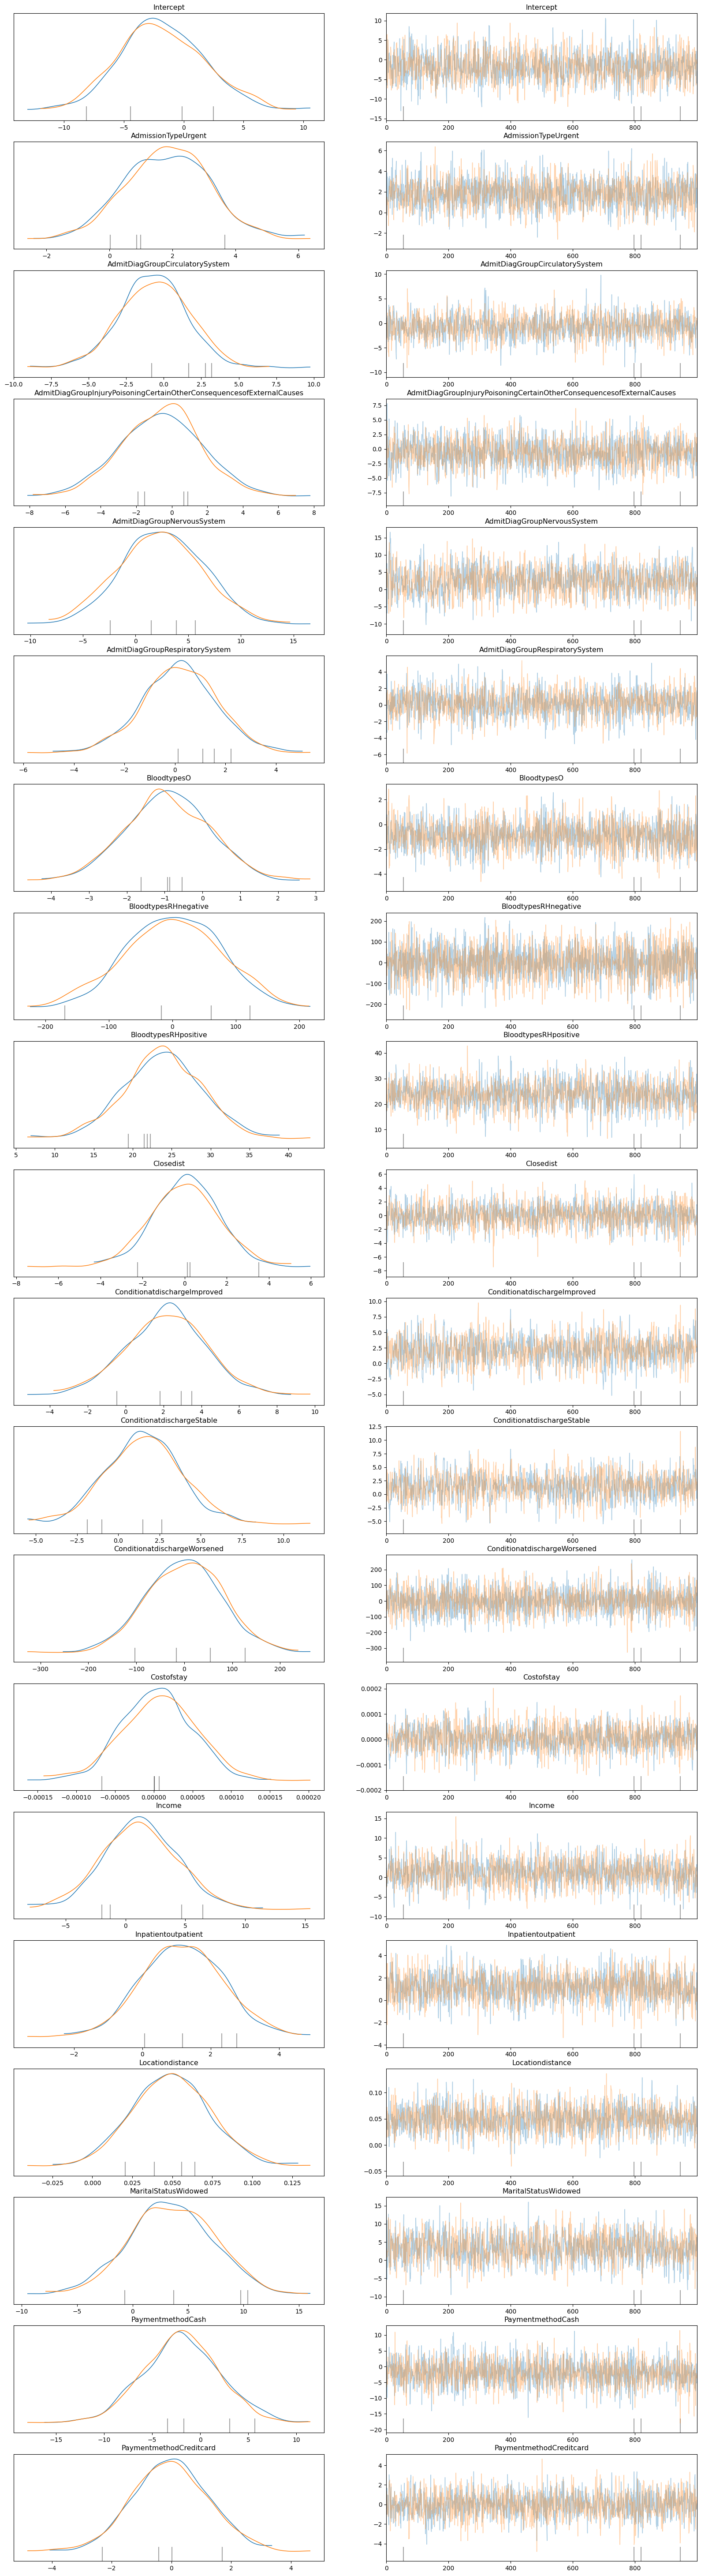

In [ ]:
az.plot_trace(results, var_names=["Intercept", 'AdmissionTypeUrgent' , 'AdmitDiagGroupCirculatorySystem' , 'AdmitDiagGroupInjuryPoisoningCertainOtherConsequencesofExternalCauses' , 'AdmitDiagGroupNervousSystem' , 'AdmitDiagGroupRespiratorySystem' , 'BloodtypesO' , 'BloodtypesRHnegative' , 'BloodtypesRHpositive' , 'Closedist' , 'ConditionatdischargeImproved' , 'ConditionatdischargeStable' , 'ConditionatdischargeWorsened' , 'Costofstay' , 'Income' , 'Inpatientoutpatient' , 'Locationdistance' , 'MaritalStatusWidowed' , 'PaymentmethodCash' , 'PaymentmethodCreditcard' , 'PaymentmethodOther' , 'SeverityofinjuriesLifethreatening' , 'SeverityofinjuriesNonlifeThreatening' , 'SeverityofinjuriesSevere' , 'Weight'],
              compact=False, figsize=(20,75)
);

In [107]:
values_model = az.summary(results, var_names=["Intercept", 'AdmissionTypeUrgent' , 'AdmitDiagGroupCirculatorySystem' , 'AdmitDiagGroupInjuryPoisoningCertainOtherConsequencesofExternalCauses' , 'AdmitDiagGroupNervousSystem' , 'AdmitDiagGroupRespiratorySystem' , 'BloodtypesO' , 'BloodtypesRHnegative' , 'BloodtypesRHpositive' , 'Closedist' , 'ConditionatdischargeImproved' , 'ConditionatdischargeStable' , 'ConditionatdischargeWorsened' , 'Costofstay' , 'Income' , 'Inpatientoutpatient' , 'Locationdistance' , 'MaritalStatusWidowed' , 'PaymentmethodCash' , 'PaymentmethodCreditcard' , 'PaymentmethodOther' , 'SeverityofinjuriesLifethreatening' , 'SeverityofinjuriesNonlifeThreatening' , 'SeverityofinjuriesSevere' , 'Weight'])
np.sqrt(np.sum(values_model['sd']*values_model['sd']))

133.64237069507558

In [57]:
values_model['mean']

Intercept                                                                -1.799
AdmissionTypeUrgent                                                       1.844
AdmitDiagGroupCirculatorySystem                                          -0.661
AdmitDiagGroupInjuryPoisoningCertainOtherConsequencesofExternalCauses    -0.602
AdmitDiagGroupNervousSystem                                               2.451
AdmitDiagGroupRespiratorySystem                                           0.174
BloodtypesO                                                              -0.920
BloodtypesRHnegative                                                      0.865
BloodtypesRHpositive                                                     23.845
Closedist                                                                 0.031
ConditionatdischargeImproved                                              2.133
ConditionatdischargeStable                                                1.501
ConditionatdischargeWorsened            

In [45]:
from google.colab import files
df.to_csv('patients_v2.csv', encoding = 'utf-8-sig')
files.download('patients_v2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [103]:
cols = ['AdmissionTypeUrgent' , 'AdmitDiagGroupCirculatorySystem' , 'AdmitDiagGroupInjuryPoisoningCertainOtherConsequencesofExternalCauses' , 'AdmitDiagGroupNervousSystem' , 'AdmitDiagGroupRespiratorySystem' , 'BloodtypesO' , 'BloodtypesRHnegative' , 'BloodtypesRHpositive' , 'Closedist' , 'ConditionatdischargeImproved' , 'ConditionatdischargeStable' , 'ConditionatdischargeWorsened' , 'Costofstay' , 'Income' , 'Inpatientoutpatient' , 'Locationdistance' , 'MaritalStatusWidowed' , 'PaymentmethodCash' , 'PaymentmethodCreditcard' , 'PaymentmethodOther' , 'SeverityofinjuriesLifethreatening' , 'SeverityofinjuriesNonlifeThreatening' , 'SeverityofinjuriesSevere' , 'Weight']
mean_vals = np.insert(df[cols].mean().values, 0, 1)
mean_vals



array([1.00000000e+00, 2.29510000e-01, 9.83600000e-02, 8.19700000e-02,
       4.91800000e-02, 2.45900000e-01, 4.26230000e-01, 1.63900000e-02,
       1.63900000e-02, 2.95080000e-01, 3.93440000e-01, 5.08200000e-01,
       1.63900000e-02, 5.45235525e+03, 6.12020000e-01, 5.57380000e-01,
       1.61655700e+01, 6.55700000e-02, 1.63900000e-02, 3.11480000e-01,
       1.63900000e-02, 1.63930000e-01, 4.42620000e-01, 2.45900000e-01,
       7.33442600e+01])

In [105]:
df[cols].mean()

AdmissionTypeUrgent                                                         0.229508
AdmitDiagGroupCirculatorySystem                                             0.098361
AdmitDiagGroupInjuryPoisoningCertainOtherConsequencesofExternalCauses       0.081967
AdmitDiagGroupNervousSystem                                                 0.049180
AdmitDiagGroupRespiratorySystem                                             0.245902
BloodtypesO                                                                 0.426230
BloodtypesRHnegative                                                        0.016393
BloodtypesRHpositive                                                        0.016393
Closedist                                                                   0.295082
ConditionatdischargeImproved                                                0.393443
ConditionatdischargeStable                                                  0.508197
ConditionatdischargeWorsened                                     

In [106]:
mean_model_sample = np.sum((values_model['mean'] * mean_vals).values)
mean_model_sample

3.0433754098360657

In [109]:
import scipy.stats as stats
probability = stats.norm.cdf(2, loc=mean_model_sample, scale=np.sqrt(17860.283245))
print("Probability of LOS <= 2:", probability)
print("Probability of LOS > 2:", 1-probability)

Probability of LOS <= 2: 0.4968854014289718
Probability of LOS > 2: 0.5031145985710281
